In [92]:
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt

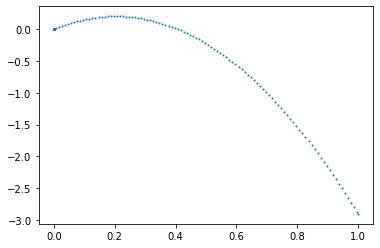

In [106]:
def dynamic_model(t,X):
    X = np.array(X)
    g = -9.81
    dx = 0*X
    dx[0,:] = X[2,:]
    dx[1,:] = X[3,:]
    dx[2,:] = 0
    dx[3,:] = g
    
    
    return dx
    
y_0 = np.array([0,0,1,2])

result = spint.RK45(dynamic_model,
                    t0=0,
                    y0=y_0,
                    t_bound=1,
                    max_step = 0.01,
                    vectorized=True)


states = np.zeros((1000,np.size(y_0)))
ct = 0
while result.t<result.t_bound:
    result.step()
    states[ct, :] = result.y
    ct += 1
    

np.delete(states, range(ct,1000), axis=0)

plt.scatter(states[:,0],states[:,1],s=1)

In [107]:
result.y

array([ 1.   , -2.905,  1.   , -7.81 ])